In [4]:
from auroraPSI.itx_adapter import ItxAdapter
from auroraPSI.pandas_plotter_adapter import PlotterAdapter
import pandas as pd

## Data loading

We load the original Krakow data in format itx, we resample at different resolutions

In [5]:
itx_adapter = ItxAdapter.read_file("../data/observations/KRK_input_10min.itx")

krakow_dict = itx_adapter.to_pandas()
krakow_df = pd.concat([krakow_dict['data'], krakow_dict['errors']])


In [6]:
krakow_df.drop(['12.0','37.0','12.0_err','37.0_err'],axis=1,inplace=True)

krakow_df_10min = krakow_df.resample("10min").mean()
krakow_df_30min = krakow_df.resample("30min").mean()
krakow_df_1h = krakow_df.resample("1H").mean()
krakow_df_1d = krakow_df.resample("1D").mean()
krakow_df_1d

,13.0,15.0,16.0,17.0,18.0,24.0,25.0,26.0,27.0,29.0,...,111.0_err,112.0_err,113.0_err,114.0_err,115.0_err,116.0_err,117.0_err,118.0_err,119.0_err,120.0_err
2018-01-08,0.014055,0.102155,0.027441,0.171507,0.686027,0.006098,0.025926,0.103365,0.201994,0.520907,...,0.021316,0.021475,0.022296,0.021437,0.025571,0.022757,0.024427,0.024161,0.026616,0.025608
2018-01-09,0.018290,0.077865,0.030996,0.193724,0.774897,0.007964,0.021984,0.096851,0.260341,0.499474,...,0.029157,0.029216,0.030611,0.030610,0.033527,0.031991,0.033429,0.033977,0.035991,0.036060
2018-01-10,0.029415,0.279947,0.092737,0.579608,2.318432,0.011006,0.058479,0.260626,0.720267,1.354080,...,0.028673,0.027865,0.030446,0.029183,0.035737,0.031285,0.033271,0.033243,0.036758,0.035786
2018-01-11,0.009301,0.201311,0.075616,0.472597,1.890389,0.011154,0.039086,0.206234,0.452590,0.990080,...,0.023947,0.023570,0.025212,0.024611,0.028369,0.026283,0.027635,0.027676,0.030122,0.029865
2018-01-12,0.017854,0.129223,0.043047,0.269046,1.076182,0.006735,0.025062,0.116785,0.282339,0.577005,...,0.019799,0.019666,0.020611,0.020631,0.022779,0.021941,0.022932,0.023319,0.024768,0.024983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-06,0.076152,0.484725,0.191255,1.195345,4.781380,0.028208,0.082568,0.397512,0.928469,1.923288,...,0.021318,0.020658,0.021963,0.021478,0.024533,0.022873,0.024345,0.024496,0.026371,0.026384
2019-04-07,0.065290,0.293351,0.127214,0.795088,3.180350,0.018417,0.056646,0.251732,0.632129,1.314406,...,0.019503,0.019281,0.020475,0.020101,0.022936,0.021492,0.022724,0.022947,0.024563,0.024585
2019-04-08,0.076184,0.356353,0.168764,1.054777,4.219108,0.026081,0.074363,0.344594,0.831784,1.581721,...,0.019614,0.019090,0.020360,0.019864,0.023091,0.021296,0.022620,0.022738,0.024569,0.024391
2019-04-09,0.077884,0.356973,0.173369,1.083557,4.334230,0.025225,0.071340,0.330305,0.761167,1.410623,...,0.019142,0.018613,0.019789,0.019385,0.021686,0.020638,0.021721,0.021944,0.023484,0.023560


In [7]:
plotter = PlotterAdapter(krakow_df_10min)
plotter.scatter_plot()

interactive(children=(Dropdown(description='x', options=('13.0', '15.0', '16.0', '17.0', '18.0', '24.0', '25.0…

In [8]:
plotter.date_plot()

interactive(children=(Dropdown(description='y', options=('15.0', '16.0', '17.0', '18.0', '24.0', '25.0', '26.0…

In [9]:
plotter.histogram_plot()

interactive(children=(Dropdown(description='x', options=('13.0', '15.0', '16.0', '17.0', '18.0', '24.0', '25.0…

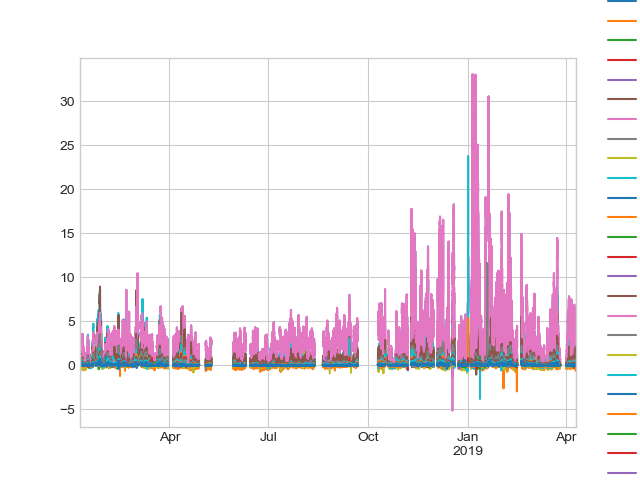

In [10]:
plotter.all_plot()

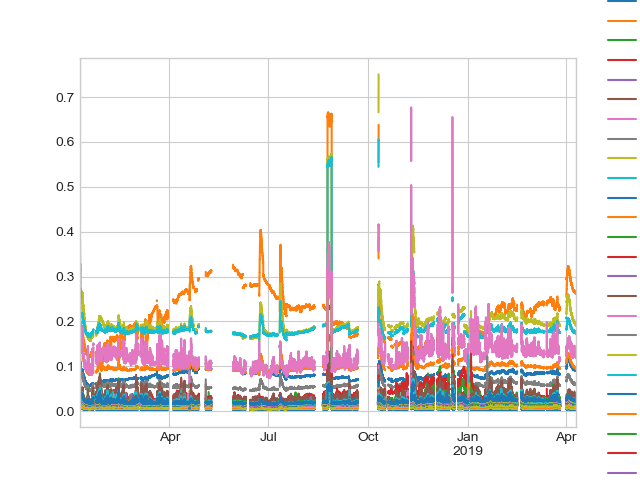

In [11]:
plotter.all_error_plot()